![header](../figures/logos_partenaires._cmems_se.jpg)


<div class="alert alert-block alert-success">
<h1><center>Demo: Denoising discontinuity detection </center></h1></div>

***
**Authors:**  Datlas, IGE, IMEDEA & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMEDEA & CLS <br>
**License:** MIT

In [34]:
import numpy as np
import xarray as xr
import pathlib
import sys
import datetime 
import matplotlib.pyplot as plt

#import zcollection

from skimage import morphology, filters
import cv2

## 1. Set parameters

In [110]:
 
sys.path.append('..')
from src.dict_regions_info import *
region_info = RegionInfo('GS_info').region_info

method_name = 'Gomez_V1'
var_name = 'ssha_gomezfilt'
path_data = '../denoised_data/swot_1j_share_GS_gomezfilt.nc'

## 2. Open the data

In [111]:
ds = xr.open_mfdataset(path_data)

## 3. Apply Roberts discontinuity detection

### Raw SWOT data

In [113]:
ssh_filt = ds.ssha_new_editing.values
u_filt = np.gradient( np.gradient(ssh_filt, axis = 0), axis = 0 )
v_filt = np.gradient( np.gradient(ssh_filt, axis = 1), axis = 1 )
V_filt1 = np.sqrt(u_filt**2 + v_filt**2)
robert_ssh1 = filters.roberts(V_filt1)

mask1 = np.zeros_like(robert_ssh1)
mask1[np.where((robert_ssh1 >= 0.0025) | (V_filt1 >= 0.010))] = 1.
 

### Unet baseline data

In [114]:
ssh_filt = ds.ssha_denoised_unet.values
u_filt = np.gradient( np.gradient(ssh_filt, axis = 0), axis = 0 )
v_filt = np.gradient( np.gradient(ssh_filt, axis = 1), axis = 1 )
V_filt2 = np.sqrt(u_filt**2 + v_filt**2)
robert_ssh2 = filters.roberts(V_filt2)

mask2 = np.zeros_like(robert_ssh2)
mask2[np.where((robert_ssh2 >= 0.0025) | (V_filt2 >= 0.010))] = 1.
 

### Evaluated denoising data

In [115]:
ssh_filt = ds[var_name].values
u_filt = np.gradient( np.gradient(ssh_filt, axis = 0), axis = 0 )
v_filt = np.gradient( np.gradient(ssh_filt, axis = 1), axis = 1 )
V_filt3 = np.sqrt(u_filt**2 + v_filt**2)
robert_ssh3 = filters.roberts(V_filt3)

mask3 = np.zeros_like(robert_ssh3)
mask3[np.where((robert_ssh3 >= 0.0025) | (V_filt3 >= 0.010))] = 1.


## 4. Plot one pass to visualize the discontinuities

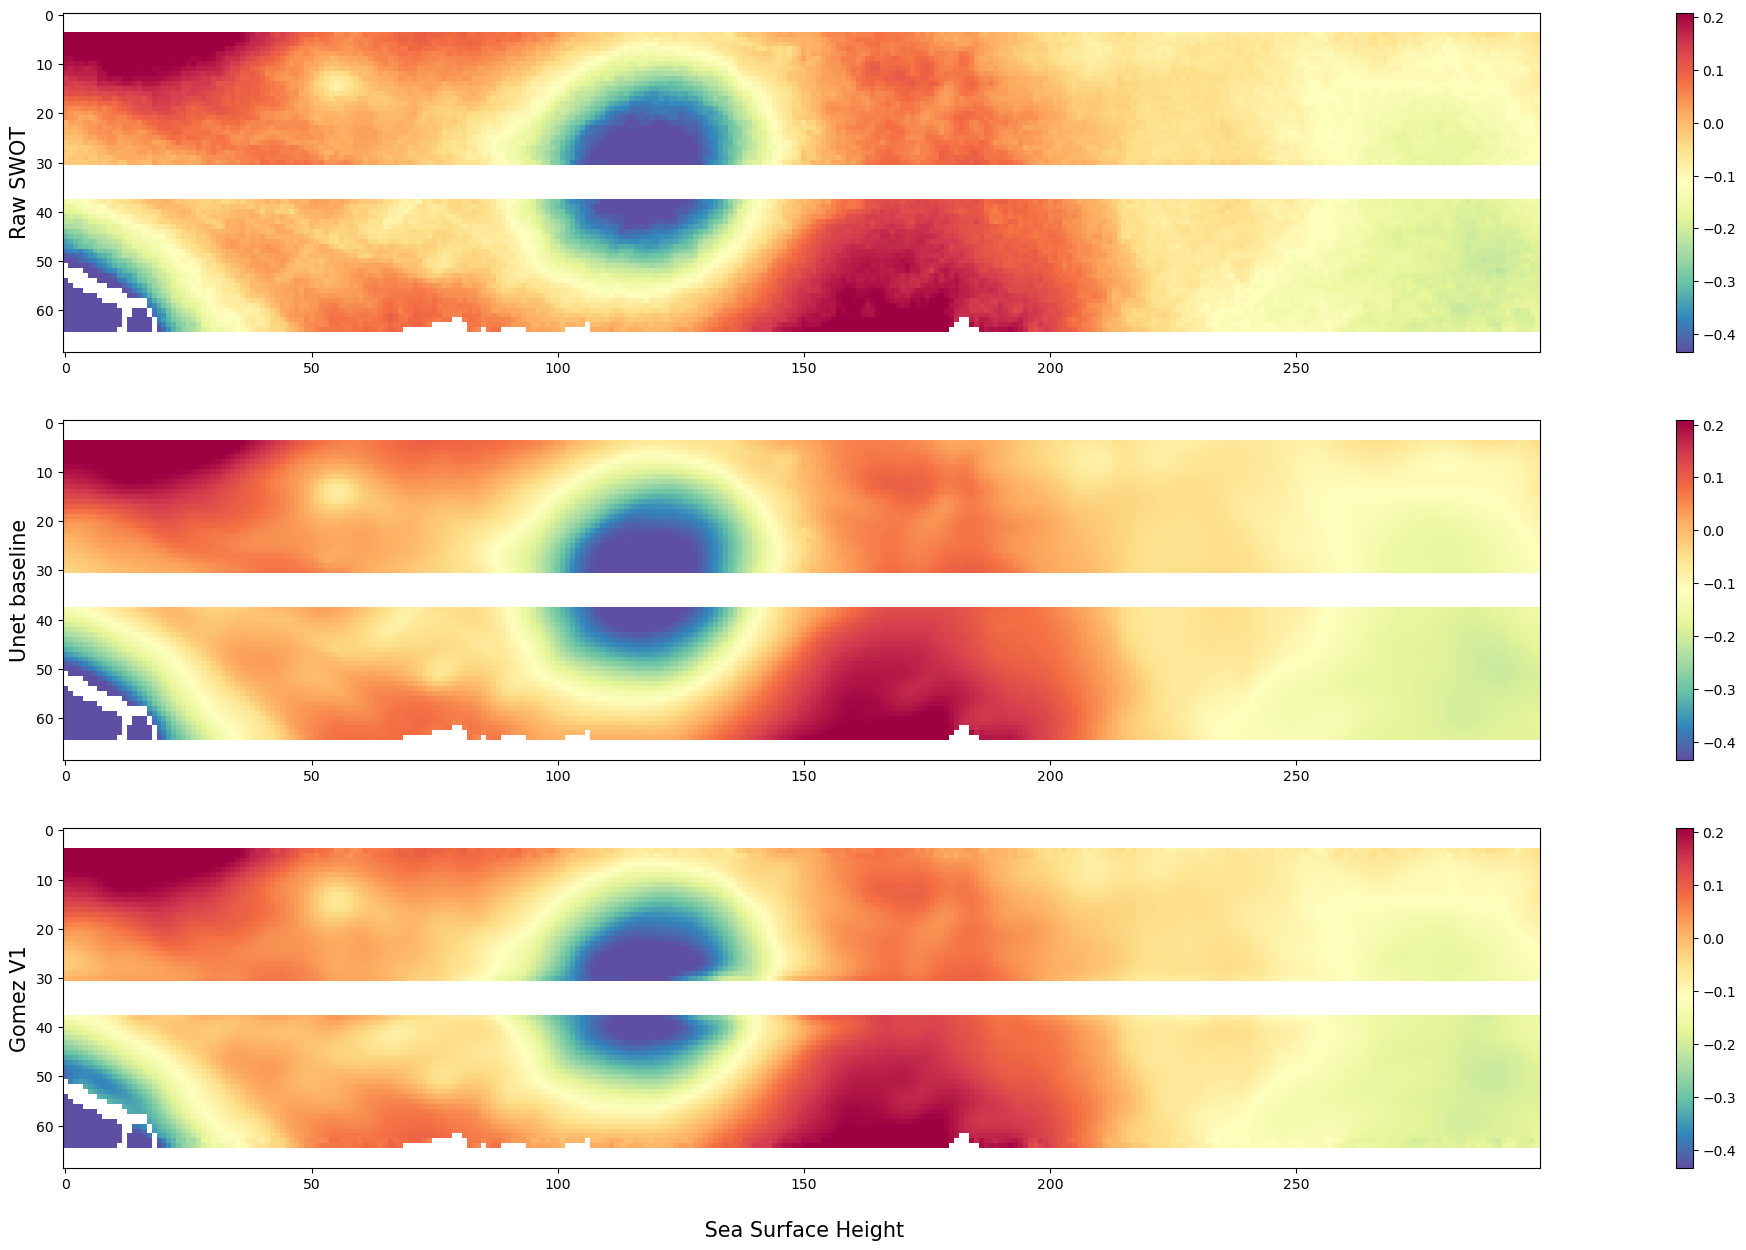

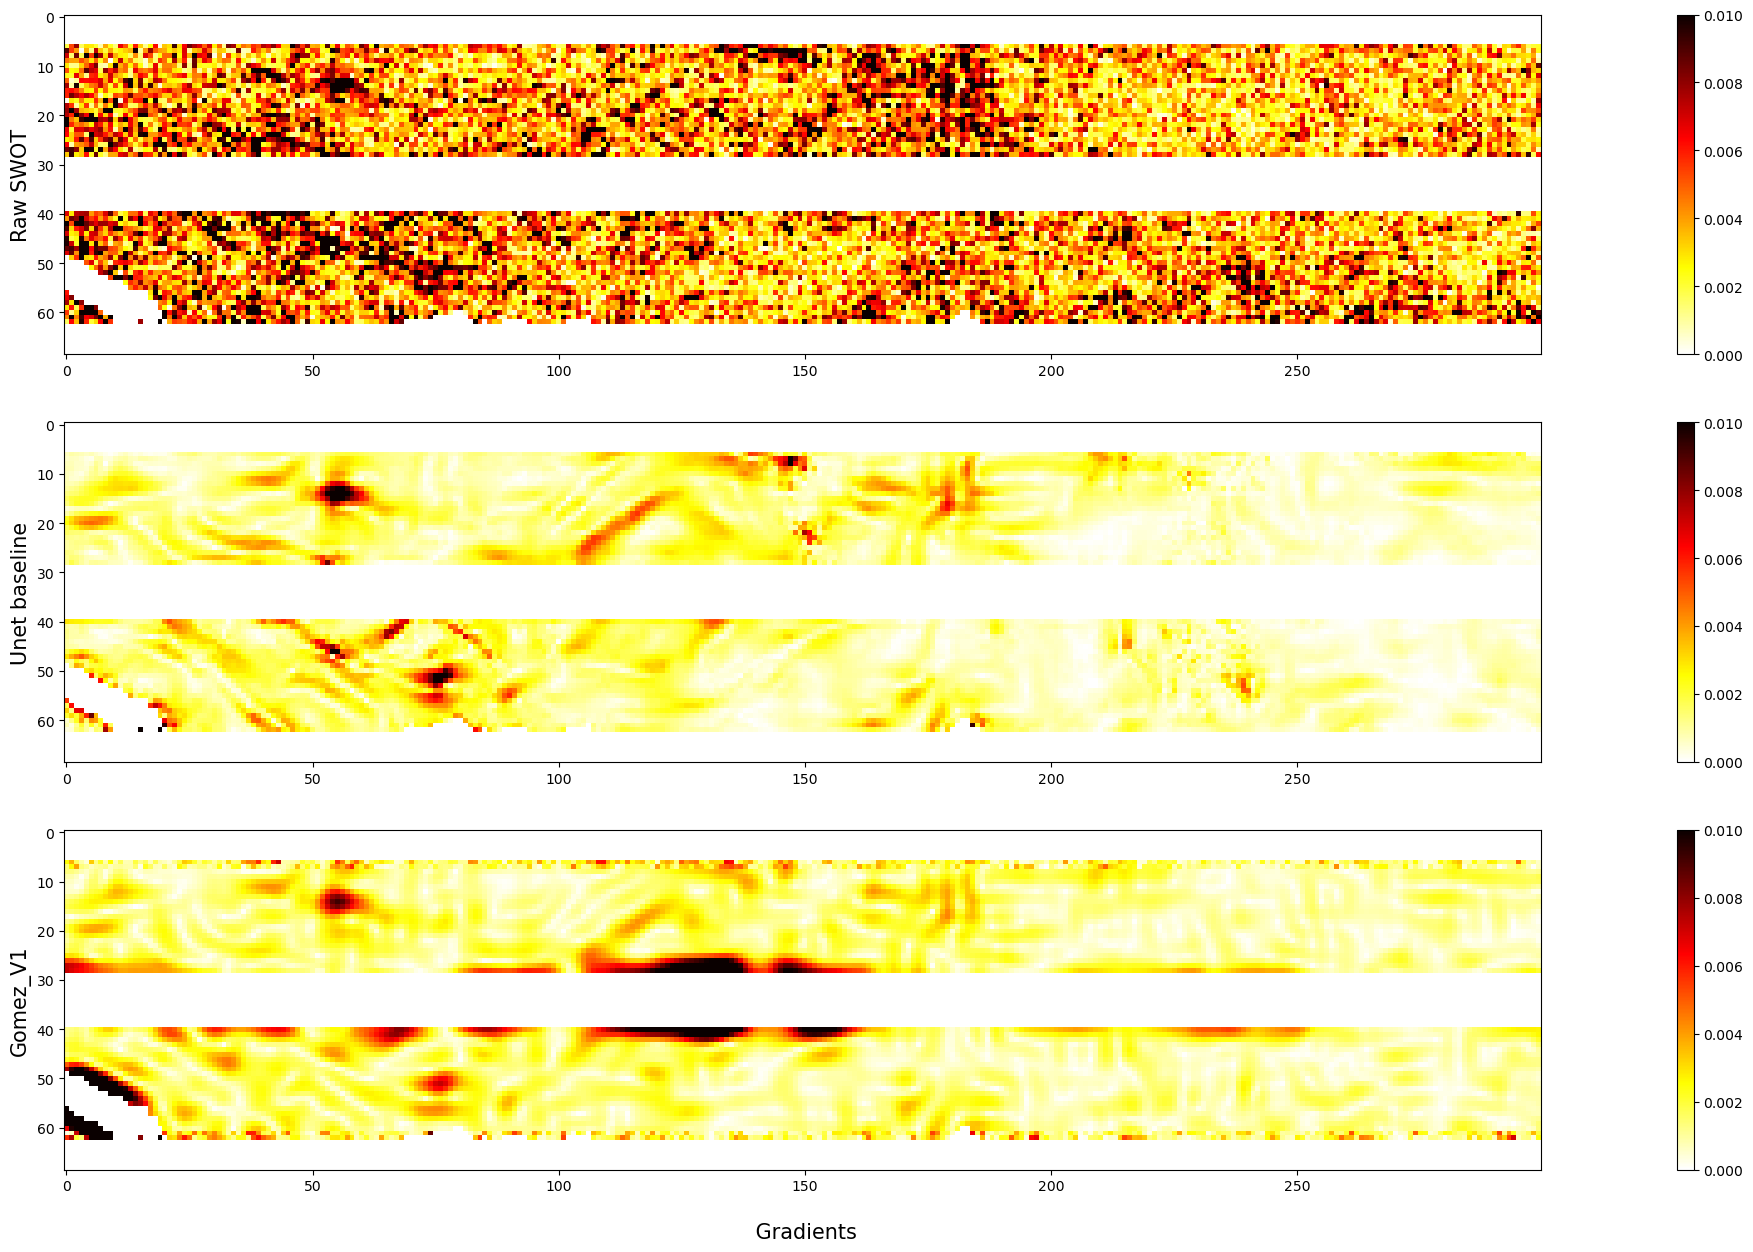

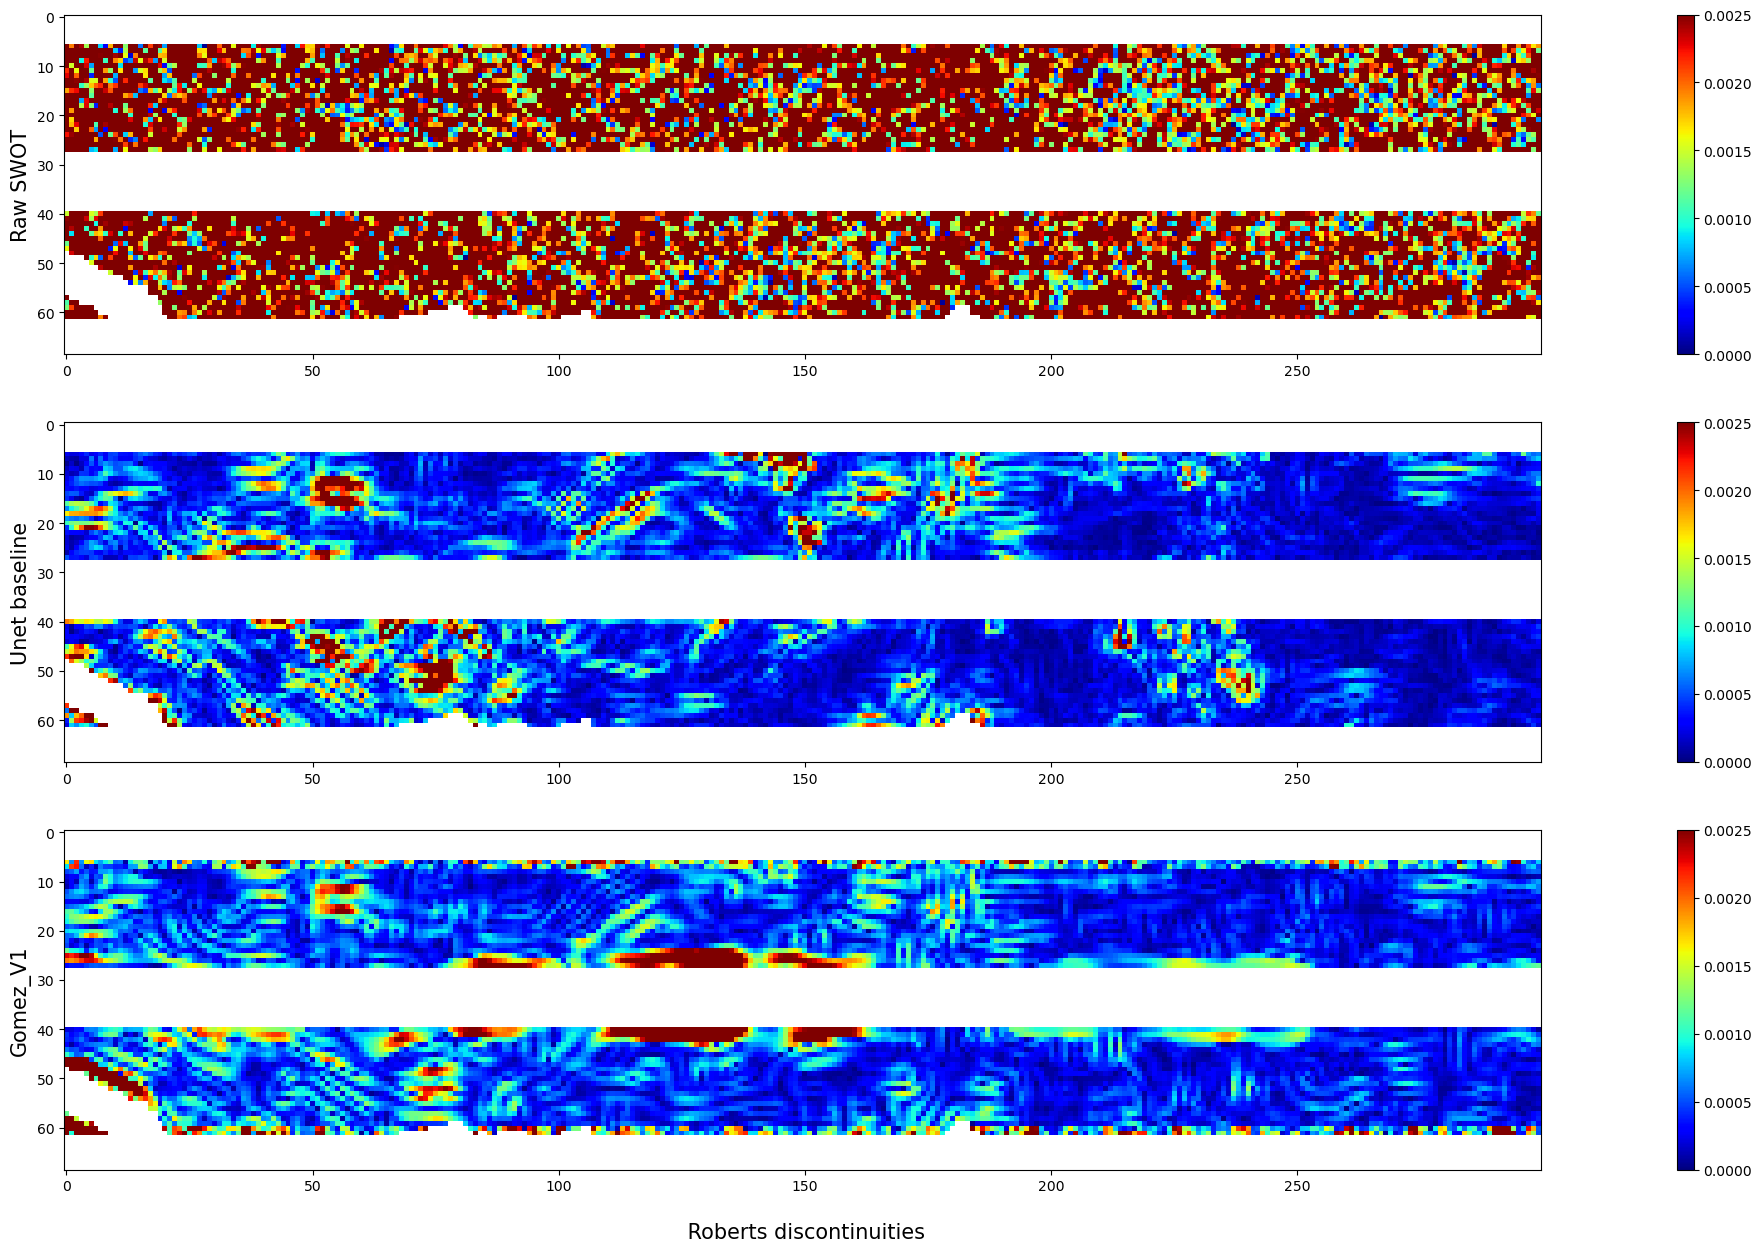

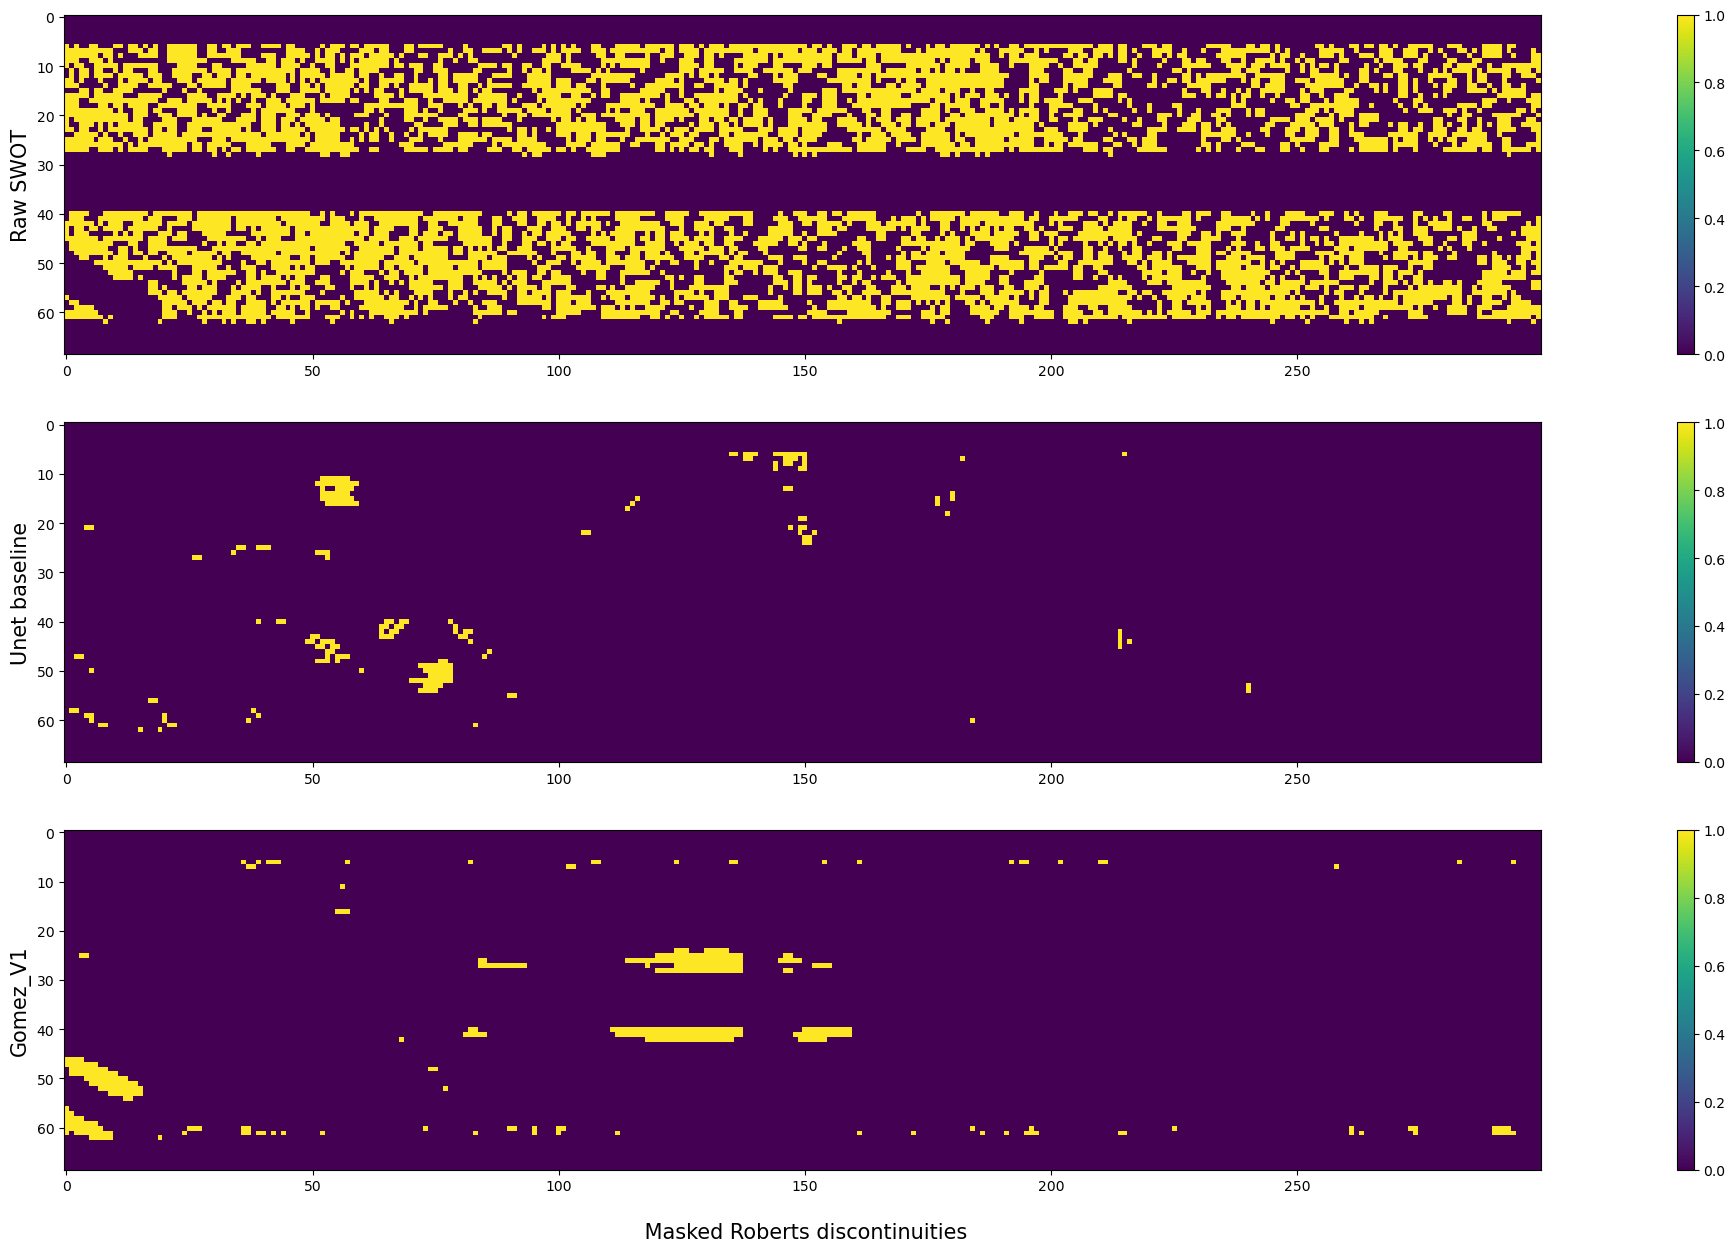

In [116]:
i0 = 10000
i1 = i0 + 300
  

vmin = np.nanquantile(ds.ssha_new_editing.values[i0:i1, :], 0.02)
vmax = np.nanquantile(ds.ssha_new_editing.values[i0:i1, :], 0.98)

plt.figure(figsize = (35, 15)) 
plt.subplot(3,1,1)
plt.imshow(ds.ssha_new_editing.values[i0:i1, :].T, cmap='Spectral_r', vmin = vmin, vmax = vmax )
plt.colorbar() 
plt.ylabel('Raw SWOT',fontsize=15)

plt.subplot(3,1,2)
plt.imshow(ds.ssha_denoised_unet.values[i0:i1, :].T, cmap='Spectral_r', vmin = vmin, vmax = vmax )
plt.colorbar() 
plt.ylabel('Unet baseline',fontsize=15)

plt.subplot(3,1,3)
plt.imshow(ds.ssha_gomezfilt.values[i0:i1, :].T, cmap='Spectral_r', vmin = vmin, vmax = vmax )
plt.colorbar()
plt.ylabel('Gomez V1',fontsize=15)
plt.xlabel('\n Sea Surface Height',fontsize=15)
plt.show()

vmin2 = 0
vmax2 = 0.010 #np.nanquantile(V_filt[i0:i1, :], 0.98)

plt.figure(figsize = (35, 15))  
plt.subplot(3,1,1)
plt.imshow(V_filt1[i0:i1, :].T, cmap='hot_r', vmin = vmin2, vmax = vmax2 )
plt.colorbar() 
plt.ylabel('Raw SWOT',fontsize=15)

plt.subplot(3,1,2)
plt.imshow(V_filt2[i0:i1, :].T, cmap='hot_r', vmin = vmin2, vmax = vmax2 )
plt.colorbar() 
plt.ylabel('Unet baseline',fontsize=15)

plt.subplot(3,1,3)
plt.imshow(V_filt3[i0:i1, :].T, cmap='hot_r', vmin = vmin2, vmax = vmax2 )
plt.colorbar()
plt.ylabel(method_name,fontsize=15)
plt.xlabel('\n Gradients',fontsize=15)
plt.show() 


vmin3 = 0
vmax3 =0.0025

plt.figure(figsize = (35, 15))  
plt.subplot(3,1,1)
plt.imshow(robert_ssh1[i0:i1, :].T, cmap='jet', vmin = vmin3, vmax = vmax3)
plt.colorbar() 
plt.ylabel('Raw SWOT',fontsize=15)

plt.subplot(3,1,2)
plt.imshow(robert_ssh2[i0:i1, :].T, cmap='jet', vmin = vmin3, vmax = vmax3)
plt.colorbar() 
plt.ylabel('Unet baseline',fontsize=15)

plt.subplot(3,1,3)
plt.imshow(robert_ssh3[i0:i1, :].T, cmap='jet', vmin = vmin3, vmax = vmax3)
plt.colorbar()
plt.ylabel(method_name,fontsize=15)
plt.xlabel('\n Roberts discontinuities',fontsize=15)
plt.show()

plt.figure(figsize = (35, 15))  
plt.subplot(3,1,1)
plt.imshow(mask1[i0:i1, :].T, cmap='viridis')
plt.colorbar() 
plt.ylabel('Raw SWOT',fontsize=15)

plt.subplot(3,1,2)
plt.imshow(mask2[i0:i1, :].T, cmap='viridis')
plt.colorbar() 
plt.ylabel('Unet baseline',fontsize=15)

plt.subplot(3,1,3)
plt.imshow(mask3[i0:i1, :].T, cmap='viridis')
plt.colorbar()
plt.ylabel(method_name,fontsize=15)
plt.xlabel('\n Masked Roberts discontinuities',fontsize=15)
plt.show()

## 5. Percentages of discontinuities in the data

In [117]:

print('Percentage of raw SWOT discontinuities:',np.sum(mask1)/np.size(mask1))
print('Percentage of Unet baseline discontinuities:',np.sum(mask2)/np.size(mask2))
print('Percentage of '+method_name+' discontinuities:',np.sum(mask3)/np.size(mask3))

Percentage of raw SWOT discontinuities: 0.2931515750879265
Percentage of Unet baseline discontinuities: 0.0152824913022134
Percentage of Gomez_V1 discontinuities: 0.016259584166352432


## 6. Number of discontinuities in function of the SWH

In [119]:
swh_flag = ds.swh_model.values.copy()
swh_flag[mask1 == 0] = np.nan 
swh_flag = swh_flag[~np.isnan(swh_flag)]
hist_flag1 = np.histogram(swh_flag, bins = np.arange(0, 10.8, 0.1)) 

swh_flag = ds.swh_model.values.copy()
swh_flag[mask2 == 0] = np.nan 
swh_flag = swh_flag[~np.isnan(swh_flag)]
hist_flag2 = np.histogram(swh_flag, bins = np.arange(0, 10.8, 0.1)) 

swh_flag = ds.swh_model.values.copy()
swh_flag[mask3 == 0] = np.nan 
swh_flag = swh_flag[~np.isnan(swh_flag)]
hist_flag3 = np.histogram(swh_flag, bins = np.arange(0, 10.8, 0.1)) 

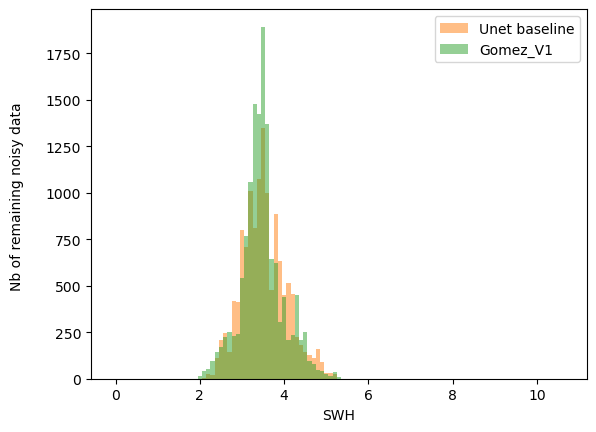

In [121]:
fig = plt.figure()
#plt.bar(hist_flag1[1][:-1], hist_flag1[0], width=np.diff(hist_flag1[1]), alpha = 0.5, color = 'tab:blue', label='Raw SWOT') 
plt.bar(hist_flag2[1][:-1], hist_flag2[0], width=np.diff(hist_flag2[1]), alpha = 0.5, color = 'tab:orange', label='Unet baseline') 
plt.bar(hist_flag3[1][:-1], hist_flag3[0], width=np.diff(hist_flag3[1]), alpha = 0.5, color = 'tab:green', label=method_name) 

plt.ylabel('Nb of remaining discontinuities data \n' ) 
plt.xlabel('SWH')
 
plt.legend()

plt.show()

## 7. Spatial repartition of the discontinuities

In [122]:
import pyinterp
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [125]:
binning1 = pyinterp.Binning2D(
    pyinterp.Axis(np.arange(0, 360, 1), is_circle=True),
    pyinterp.Axis(np.arange(-90, 90, 1)))
binning1.clear()
binning1.push(ds.longitude, ds.latitude, mask1, True)

sum_mask1 = binning1.variable('sum')

binning2 = pyinterp.Binning2D(
    pyinterp.Axis(np.arange(0, 360, 1), is_circle=True),
    pyinterp.Axis(np.arange(-90, 90, 1)))
binning2.clear()
binning2.push(ds.longitude, ds.latitude, mask2, True)

sum_mask2 = binning2.variable('sum')

binning3 = pyinterp.Binning2D(
    pyinterp.Axis(np.arange(0, 360, 1), is_circle=True),
    pyinterp.Axis(np.arange(-90, 90, 1)))
binning3.clear()
binning3.push(ds.longitude, ds.latitude, mask3, True)

sum_mask3 = binning3.variable('sum')

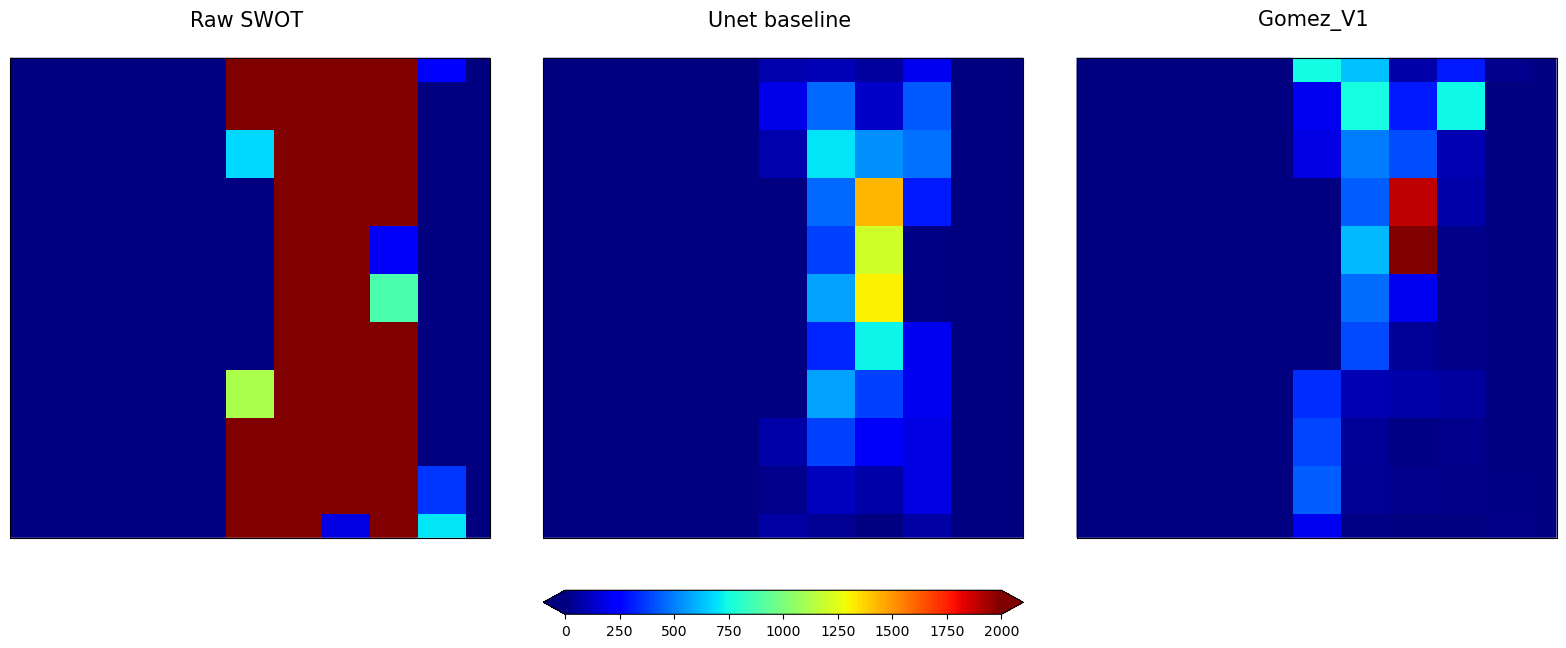

In [174]:
f = plt.figure(figsize=(16,10)) 
ax = f.add_axes([0,0,0.3,1], projection=ccrs.PlateCarree())
ax.set_title('Raw SWOT \n',fontsize=15)
xx, yy = np.meshgrid(binning1.x, 
                 binning1.y, 
                 indexing='ij')
ax.set_global()
ax.add_feature(cfeature.LAND, zorder=100, color='#969696')
mappable = ax.pcolormesh(xx,
         yy,
         sum_mask1,
         transform=ccrs.PlateCarree(),
         cmap='jet', vmin = 0, vmax = 2000 )
 

plt.xlim(region_info['lon_min'],region_info['lon_max'])
plt.ylim(region_info['lat_min'],region_info['lat_max'])


ax1 = f.add_axes([0.3333,0.05,0.3,1.05], projection=ccrs.PlateCarree())
ax1.set_title('Unet baseline \n',fontsize=15)
xx, yy = np.meshgrid(binning2.x, 
                 binning2.y, 
                 indexing='ij')
ax1.set_global()
ax1.add_feature(cfeature.LAND, zorder=100, color='#969696')
mappable = ax1.pcolormesh(xx,
         yy,
         sum_mask2,
         transform=ccrs.PlateCarree(),
         cmap='jet', vmin = 0, vmax = 2000 )
 

plt.xlim(region_info['lon_min'],region_info['lon_max'])
plt.ylim(region_info['lat_min'],region_info['lat_max'])

#Colorbar
cb = f.colorbar(mappable, 
                orientation='horizontal', 
                extend='both', 
                pad = 0.05)

ax2 = f.add_axes([0.6666,0,0.3,1], projection=ccrs.PlateCarree())
ax2.set_title(method_name+' \n',fontsize=15)
xx, yy = np.meshgrid(binning3.x, 
                 binning3.y, 
                 indexing='ij')
ax2.set_global()
ax2.add_feature(cfeature.LAND, zorder=100, color='#969696')
mappable = ax2.pcolormesh(xx,
         yy,
         sum_mask3,
         transform=ccrs.PlateCarree(),
         cmap='jet', vmin = 0, vmax = 2000 )
 

plt.xlim(region_info['lon_min'],region_info['lon_max'])
plt.ylim(region_info['lat_min'],region_info['lat_max'])

 
    
    
plt.show()